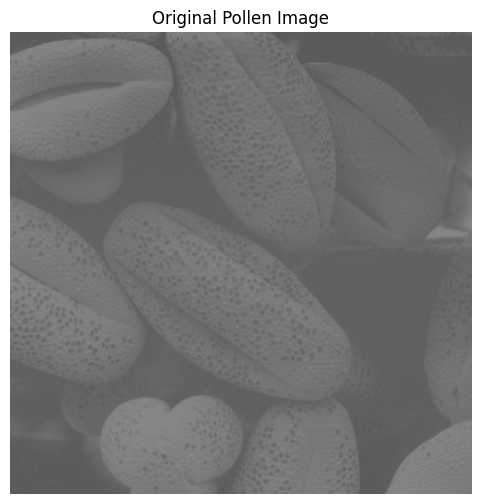

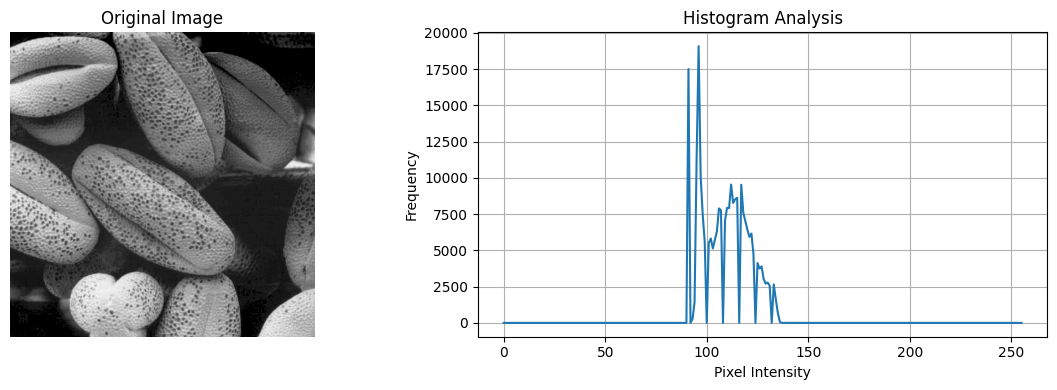

Image Statistics:
Min: 91, Max: 138
Mean: 109.1, Std Dev: 11.5

Problem Analysis:
1. The image suffers from poor contrast (narrow intensity range)
2. Histogram shows most pixel values clustered in a small range
3. Important features are not clearly visible due to low contrast


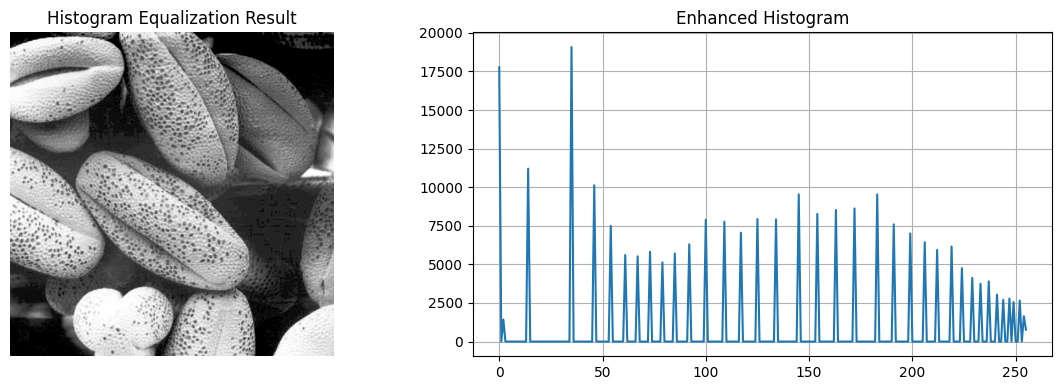


Solution 1: Histogram Equalization
- Spreads out pixel intensities across full range
- New range: 0 to 255
- Improves visibility of pollen structures


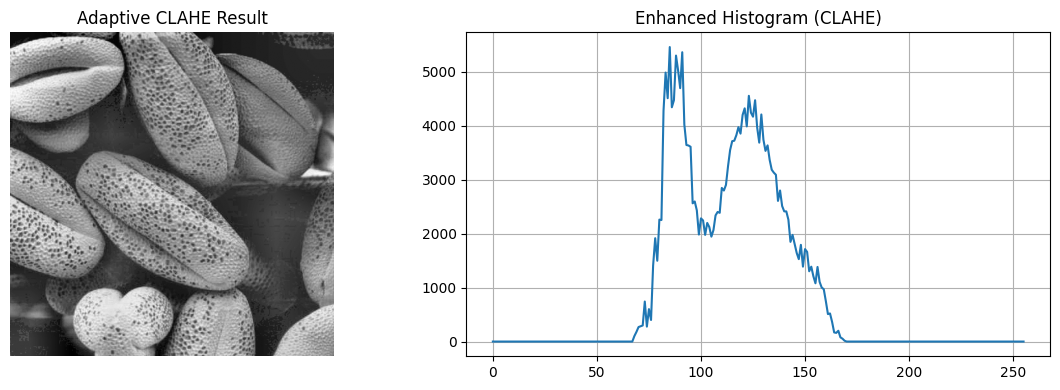


Solution 2: Adaptive Histogram Equalization (CLAHE)
- Local contrast enhancement preserves details
- Prevents over-amplification of noise
- Better reveals fine pollen structures


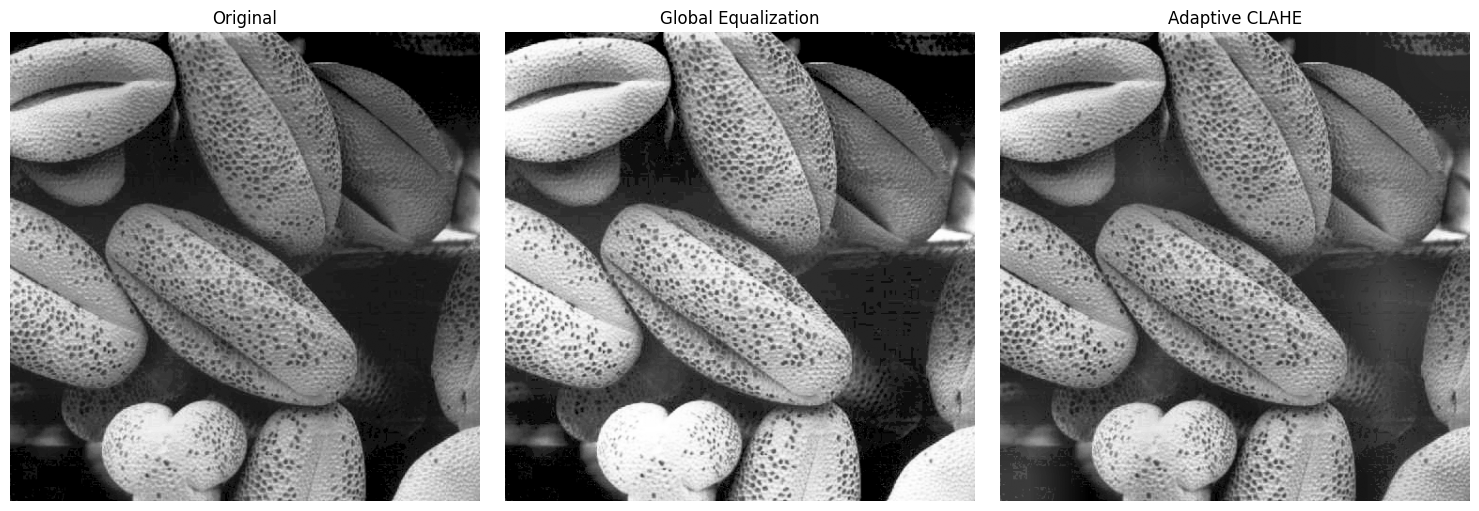

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure
from scipy import ndimage

# 1. Read and display original image
img = cv2.imread('/content/pollen.tif', cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(8, 6))
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title('Original Pollen Image')
plt.axis('off')
plt.show()

# 2. Analyze and comment on the problem
img_min, img_max = np.min(img), np.max(img)
img_mean, img_std = np.mean(img), np.std(img)
hist = cv2.calcHist([img], [0], None, [256], [0,256])

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.plot(hist)
plt.title('Histogram Analysis')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Image Statistics:")
print(f"Min: {img_min}, Max: {img_max}")
print(f"Mean: {img_mean:.1f}, Std Dev: {img_std:.1f}")
print("\nProblem Analysis:")
print("1. The image suffers from poor contrast (narrow intensity range)")
print("2. Histogram shows most pixel values clustered in a small range")
print("3. Important features are not clearly visible due to low contrast")

# 3-5. Solution 1: Histogram Equalization
eq_img = cv2.equalizeHist(img)
eq_hist = cv2.calcHist([eq_img], [0], None, [256], [0,256])

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(eq_img, cmap='gray')
plt.title('Histogram Equalization Result')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.plot(eq_hist)
plt.title('Enhanced Histogram')
plt.grid(True)
plt.tight_layout()
plt.show()

print("\nSolution 1: Histogram Equalization")
print("- Spreads out pixel intensities across full range")
print(f"- New range: {np.min(eq_img)} to {np.max(eq_img)}")
print("- Improves visibility of pollen structures")
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
adapt_img = clahe.apply(img)
adapt_hist = cv2.calcHist([adapt_img], [0], None, [256], [0,256])

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(adapt_img, cmap='gray')
plt.title('Adaptive CLAHE Result')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.plot(adapt_hist)
plt.title('Enhanced Histogram (CLAHE)')
plt.grid(True)
plt.tight_layout()
plt.show()

print("  Adaptive Histogram Equalization")
print("- Local contrast enhancement preserves details")
print("- Prevents over-amplification of noise")
print("- Better reveals fine pollen structures")

# Comparative results
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(eq_img, cmap='gray')
plt.title('Global Equalization')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(adapt_img, cmap='gray')
plt.title('Adaptive CLAHE')
plt.axis('off')
plt.tight_layout()
plt.show()